1.1 Setup and Load Data

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


Requested tensorflow-gpu from https://files.pythonhosted.org/packages/8a/45/fa31ced1db38f9424f262dfbf35747fe5378b5c808cecb373c8cb8e515d3/tensorflow-gpu-2.12.0.tar.gz has invalid metadata: Expected end or semicolon (after name and no valid version specifier)
    python_version>"3.7"
                  ^
Please use pip<24.1 if you need to use this version.
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu


In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
blinker                      1.9.0
certifi                      2024.8.30
charset-normalizer           3.4.0
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.8.8
decorator                    5.1.1
executing                    2.1.0
Flask                        3.1.0
flatbuffers                  24.3.25
fonttools                    4.55.0
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.68.0
h5py                         3.12.1
idna                         3.10
ipykernel                    6.29.5
ipython                      8.29.0
itsdangerous                 2.2.0
jedi                         0.19.2


In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [5]:
#Avoid OOM errors by setting GPU memory consumption growth
#Since TensorFlow will use all availabel vRam makes sure computer don't go boom boom
gpu = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

1.2 Remove Dodgy Images 

In [6]:
import cv2
import imghdr

C:\Users\PG092\AppData\Local\Temp\ipykernel_20076\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data'
image_exts = ['jpeg','jpg','bmp','png']

In [8]:
#gets all the image classes so cars and planes
for image_class in os.listdir(data_dir):
    #cycles through every image in collection
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try: 
            #returns a numpy array of the image
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            #check if image path is accepted
            if(tip not in image_exts):
                #image is remove if path is not accepted
                print('Image not in ext lists {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issues with image {}'.format(image_path))
            #os.remove(image_path)

1.3 Load Data

In [9]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [10]:
import numpy as np 
from matplotlib import pyplot as plt

In [11]:
#builds an image dataset from your data, and does extra-stuff like pre-processing, resizing images...
data = tf.keras.utils.image_dataset_from_directory('data')

Found 5712 files belonging to 4 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
#Images represented as numpy array (default collection of 32 imgs), gets a new batch
#it contains two elements, the first is images, the second element is labels for images
batch = data_iterator.next()

In [14]:
#returns the class labels of images, where 1 is one class and 0 is another
batch[1]

array([3, 0, 0, 2, 3, 3, 2, 0, 2, 0, 3, 1, 1, 0, 2, 3, 1, 2, 0, 1, 2, 2,
       1, 2, 0, 1, 1, 3, 1, 1, 3, 0], dtype=int32)

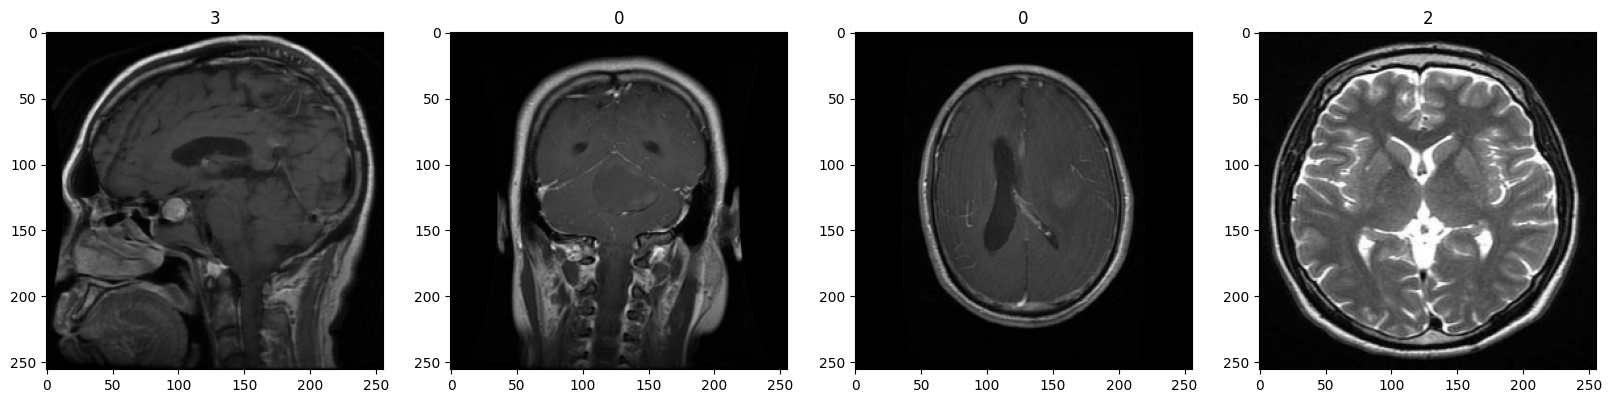

In [15]:
#lets us visualize our images to show 0 = cars and 1 = planes
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    #Sets the title of image to the class number 0 or 1
    ax[idx].title.set_text(batch[1][idx])

In [16]:
scaled = batch[0] / 255

In [17]:
scaled.max()

np.float32(1.0)

2.0 Preprocess Data

2.1 Scale Data

In [18]:
# x is our images our independent variable and y is the dependent variable or label 
# divide x by 255 to get smaller values between 0 and 1
data = data.map(lambda x,y: (x/255, y))

In [19]:
#similar to the batch from above, just without extra variable
data.as_numpy_iterator().next()

(array([[[[0.03921569, 0.03921569, 0.03921569],
          [0.03921569, 0.03921569, 0.03921569],
          [0.03921569, 0.03921569, 0.03921569],
          ...,
          [0.03921569, 0.03921569, 0.03921569],
          [0.03921569, 0.03921569, 0.03921569],
          [0.03921569, 0.03921569, 0.03921569]],
 
         [[0.03921569, 0.03921569, 0.03921569],
          [0.03921569, 0.03921569, 0.03921569],
          [0.03921569, 0.03921569, 0.03921569],
          ...,
          [0.03921569, 0.03921569, 0.03921569],
          [0.03921569, 0.03921569, 0.03921569],
          [0.03921569, 0.03921569, 0.03921569]],
 
         [[0.03921569, 0.03921569, 0.03921569],
          [0.03921569, 0.03921569, 0.03921569],
          [0.03921569, 0.03921569, 0.03921569],
          ...,
          [0.03921569, 0.03921569, 0.03921569],
          [0.03921569, 0.03921569, 0.03921569],
          [0.03921569, 0.03921569, 0.03921569]],
 
         ...,
 
         [[0.03921569, 0.03921569, 0.03921569],
          [0.03921

2.2 Split Data

In [20]:
len(data)

179

In [21]:
# the number of groups of 32 images 
train_size = int(len(data) * .7) - 1
val_size = int(len(data) * .2) + 1
test_size = int(len(data) * .1) + 1

In [22]:
train_size

124

In [23]:
train = data.take(train_size)
#skips the first batches and then takes the last ones for values
val = data.skip(train_size).take(val_size)
#skips that train and value to take the last ones for training
test = data.skip(train_size + val_size).take(test_size + 1)

In [24]:
len(test)

19

3.0 Deep Learning Model woohoo

3.1 Build Deep Learning Model

In [25]:
#Sequentials is good when you have 1 input to 1 output and the model just flows
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(4, activation='softmax'))

C:\Users\PG092\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
#adam is an optimizer for model there are many
#loss is binary bc we essentially need a 0 or 1
#we are trying to measure the accuracy of model
model.compile('adam',loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy']) 

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,396 (14.10 MB)

 Trainable params: 3,697,396 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train Model

In [30]:
logdir = 'logs'

In [31]:
#can check back later to see how the model is doing
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
#model.fit() is the actually training method of nueral network
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.5775 - loss: 0.9877 - val_accuracy: 0.7977 - val_loss: 0.5165
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - accuracy: 0.8296 - loss: 0.4353 - val_accuracy: 0.8655 - val_loss: 0.3778
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.9161 - loss: 0.2427 - val_accuracy: 0.8976 - val_loss: 0.3517
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.9489 - loss: 0.1539 - val_accuracy: 0.9106 - val_loss: 0.3463
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 29s 236ms/step - accuracy: 0.9739 - loss: 0.0815 - val_accuracy: 0.8542 - val_loss: 0.6452
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.9786 - loss: 0.0622 - val_accuracy: 0.9375 - val_loss: 0.2555
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.9907 - loss: 0.0307 - val_accuracy: 0.9436 - val_loss: 0.3338
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 29s 233ms/step - accuracy: 0.9946 - loss: 0

In [33]:
hist.history

{'accuracy': [0.7016128897666931,
  0.8571068644523621,
  0.9185987710952759,
  0.9596773982048035,
  0.975806474685669,
  0.9868951439857483,
  0.992943525314331,
  0.9921875,
  0.9901713728904724,
  0.9873992204666138,
  0.9959677457809448,
  0.999243974685669,
  0.9949596524238586,
  0.9942036271095276,
  0.9947076439857483,
  0.9974798560142517,
  0.9926915168762207,
  0.9974798560142517,
  0.9979838728904724,
  1.0],
 'loss': [0.7276344299316406,
  0.3754575848579407,
  0.2312532514333725,
  0.12526875734329224,
  0.07537128776311874,
  0.03954469412565231,
  0.024415869265794754,
  0.02976349927484989,
  0.03353108465671539,
  0.036547597497701645,
  0.013973594643175602,
  0.005986937787383795,
  0.019775686785578728,
  0.020913343876600266,
  0.013133109547197819,
  0.009937764145433903,
  0.017052073031663895,
  0.006547797471284866,
  0.006059874780476093,
  0.0007845121435821056],
 'val_accuracy': [0.7977430820465088,
  0.8654513955116272,
  0.8975694179534912,
  0.910590291

3.3 Plot Performance

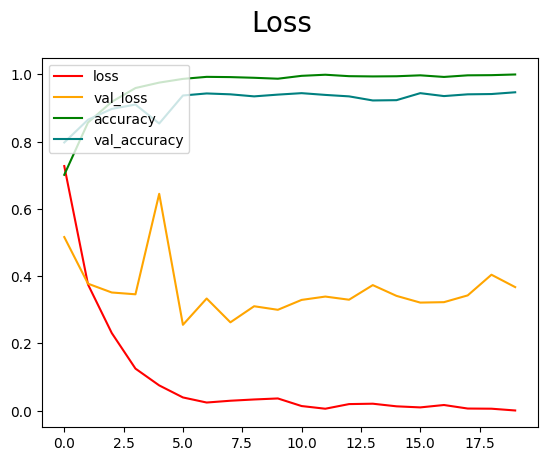

In [34]:
#plot all the data from history
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='teal', label='val_accuracy')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc='upper left')
plt.show()

4.0 Evaluate Performance

4.1 Evaluate

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
#Create instances of all the classes
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


InvalidArgumentError: {{function_node __wrapped__LogicalAnd_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [1,32] vs. [1,128] [Op:LogicalAnd] name: 

In [76]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Binary Accuracy: {acc.result().numpy()}')

Precision: 0.0, Recall: 0.0, Binary Accuracy: 0.0


4.2 Test

In [72]:
import cv2

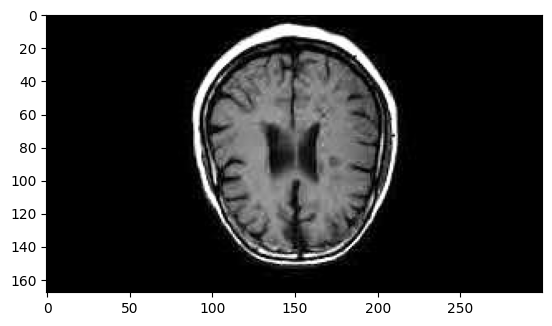

In [113]:
img = cv2.imread('test/notumor.jpg')
#cv2 reads images as color BGR and we need to convert to RGB to make normal
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

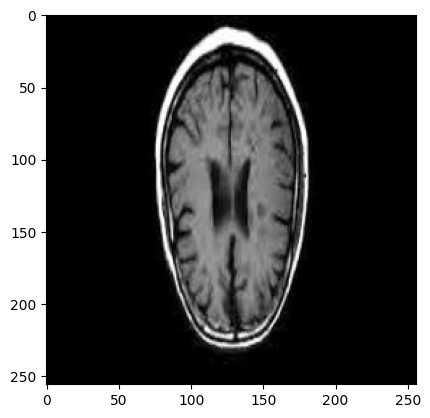

In [118]:
#need to resize image for nueral network to 256 x 256 pixels
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [119]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [120]:
yhat[0]

array([3.9394351e-07, 4.9842736e-13, 9.9999964e-01, 1.8993220e-14],
      dtype=float32)

In [121]:
if yhat[0][0] > 0.5 : print("glioma detected")
if yhat[0][1] > 0.5 : print("meningioma detected")
if yhat[0][2] > 0.5 : print("notumor detected")
if yhat[0][3] > 0.5 : print("pituatary detected")

notumor detected


5.0 Save the Model

In [122]:
from tensorflow.keras.models import load_model

In [123]:
model.save(os.path.join('models','brainTumorImageClassifierNEW.h5'))

In [271]:
new_model = load_model('models//brainTumorImageClassifierNEW.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[0.99608535]], dtype=float32)